## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toolbox_ML as tb
import bootcampviztools as bt

from PIL import Image
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
import urllib.request

## Datos

In [2]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col = 0)
df.index.name = None

In [3]:
df_bck_up = df.copy()

## Exploración de los datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [5]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_in_euros      0
dtype: int64

In [6]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [7]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [8]:
tb.describe_df(df)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
Company,object,0,19,2.08
Product,object,0,480,52.63
TypeName,object,0,6,0.66
Inches,float64,0,17,1.86
ScreenResolution,object,0,36,3.95
Cpu,object,0,107,11.73
Ram,object,0,9,0.99
Memory,object,0,37,4.06
Gpu,object,0,93,10.2
OpSys,object,0,9,0.99


In [9]:
tb.tipifica_variables(df)

,variable,tipo
0,Company,Numérica Discreta
1,Product,Numérica Continua
2,TypeName,Categórica
3,Inches,Numérica Discreta
4,ScreenResolution,Numérica Discreta
5,Cpu,Numérica Discreta
6,Ram,Categórica
7,Memory,Numérica Discreta
8,Gpu,Numérica Discreta
9,OpSys,Categórica


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [10]:
target = "Price_in_euros"

In [11]:
df.drop_duplicates(keep = "first", inplace = True)

In [12]:
# Transformamos las variables inches, ram y weight a numéricas:
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)
df.drop(columns = ["Inches", "Ram", "Weight"], inplace = True)

In [13]:
# Vemos los valores de Cpu para ver si podemos tratar esta columna:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              124
Intel Core i7 7700HQ 2.8GHz             105
Intel Core i7 7500U 2.7GHz               95
Intel Core i5 8250U 1.6GHz               52
Intel Core i7 8550U 1.8GHz               47
                                       ... 
Intel Core M 1.1GHz                       1
AMD E-Series 9000e 1.5GHz                 1
Intel Core i7 6560U 2.2GHz                1
Intel Core i5 6440HQ 2.6GHz               1
Intel Pentium Dual Core N4200 1.1GHz      1
Name: count, Length: 107, dtype: int64

In [14]:
# Tratamiento de la columna Cpu:
df["cpu_brand"] = df["Cpu"].apply(lambda x: x.split()[0])
df["cpu_speed"] = df["Cpu"].apply(lambda x: float(x.split()[-1].replace("GHz", "")))
df.drop(columns = ["Cpu"], inplace = True)
df.cpu_brand.value_counts()

cpu_brand
Intel    850
AMD       41
Name: count, dtype: int64

In [15]:
# Vamos a observar los valores de la columna Gpu para analizar cómo podemos obtener información de esta columna:
pd.DataFrame(df.Gpu.value_counts()).index

Index(['Intel HD Graphics 620', 'Intel HD Graphics 520',
       'Intel UHD Graphics 620', 'Nvidia GeForce GTX 1050',
       'Nvidia GeForce 940MX', 'Nvidia GeForce GTX 1060',
       'Intel HD Graphics 400', 'Intel HD Graphics 500',
       'Nvidia GeForce GTX 1070', 'AMD Radeon 530',
       'Nvidia GeForce GTX 1050 Ti', 'Intel HD Graphics',
       'Nvidia GeForce 930MX', 'AMD Radeon R5 M430', 'AMD Radeon 520',
       'Intel HD Graphics 515', 'Nvidia GeForce MX150',
       'Nvidia GeForce GTX 960M', 'Nvidia GeForce 920MX',
       'Intel HD Graphics 615', 'Intel HD Graphics 405',
       'Intel HD Graphics 505', 'AMD Radeon R7 M445', 'AMD Radeon R5 M420',
       'Nvidia GeForce GTX 950M', 'Intel Iris Plus Graphics 640',
       'Nvidia GeForce GTX 980M', 'AMD Radeon R2', 'AMD Radeon R5',
       'Intel HD Graphics 6000', 'Nvidia Quadro M1200', 'Nvidia GeForce 930M',
       'Intel HD Graphics 510', 'Nvidia GeForce 920MX ', 'AMD Radeon RX 580',
       'Nvidia Quadro M1000M', 'AMD Radeon RX 550

In [16]:
# Definimos una función para obtener primero la marca de la gpu y luego el modelo, pudiendo así hacer un dummies:
def process_gpu(gpu):
    gpu = gpu.replace("<U+039C>", "").lower().split(" ")
    gpu_brand, gpu_model = "", ""
    if len(gpu) == 2:
            gpu_brand = str(gpu[0])
            gpu_model = gpu[-1]
    elif len(gpu) == 3:
            gpu_brand = str(gpu[0] + " " + gpu[1])
            gpu_model = gpu[-1]
    elif len(gpu) == 4:
            gpu_brand = str(gpu[0] + " " + gpu[1])
            gpu_model = gpu[-2] + " " + gpu[-1]
    elif len(gpu) == 4:
            gpu_brand = str(gpu[0] + " " + gpu[1] + " " + gpu[2])
            gpu_model = gpu[-2] + " " + gpu[-1]
        
    return pd.Series([gpu_brand, gpu_model])

df[["gpu_brand", "gpu_model"]] = df["Gpu"].apply(process_gpu)
df.drop(columns = "Gpu", inplace = True)

In [17]:
# Hacemos un One Hot Encoding para estas cuatro variables categóricas que tienen pocas categorías:
columns_dummies = ["Company", "TypeName", "OpSys", "ScreenResolution", "cpu_brand", "gpu_brand", "gpu_model"]

df = pd.get_dummies(df, columns = columns_dummies, dtype = int)

In [18]:
# Observamos los valores de la columna Memory para poder transformarla en numérica:
df.Memory.value_counts()

Memory
256GB SSD                        282
1TB HDD                          146
500GB HDD                         86
512GB SSD                         80
128GB SSD +  1TB HDD              67
128GB SSD                         52
256GB SSD +  1TB HDD              52
32GB Flash Storage                32
1TB SSD                           12
64GB Flash Storage                 9
512GB SSD +  1TB HDD               8
2TB HDD                            8
256GB Flash Storage                7
16GB Flash Storage                 6
256GB SSD +  2TB HDD               6
32GB SSD                           5
128GB Flash Storage                4
1.0TB Hybrid                       4
180GB SSD                          3
16GB SSD                           3
512GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
1TB HDD +  1TB HDD                 1
512GB Flash Storage                1
1.0TB HDD                          1
256GB SSD +  500GB HDD             1
8GB SSD                        

In [19]:
# Definimos una función para procesar los strings de la columna Memory:
def process_memory(mem):
    mem = mem.lower().replace("tb", "000").replace("gb", "").replace(".", "")
    parts = mem.split("+")
    ssd, hdd, flash, hybrid = 0, 0, 0, 0
    for part in parts:
        if "ssd" in part:
            ssd += int(part.strip().replace("ssd", ""))
        elif "hdd" in part:
            hdd += int(part.strip().replace("hdd", ""))
        elif "flash" in part:
            flash += int(part.strip().replace("flash storage", ""))
        elif "hybrid" in part:
            hybrid += int(part.strip().replace("hybrid", ""))
    return pd.Series([ssd, hdd, flash, hybrid])

df[["ssd", "hdd", "flash", "hybrid"]] = df["Memory"].apply(process_memory)
df.drop(columns = "Memory", inplace = True)

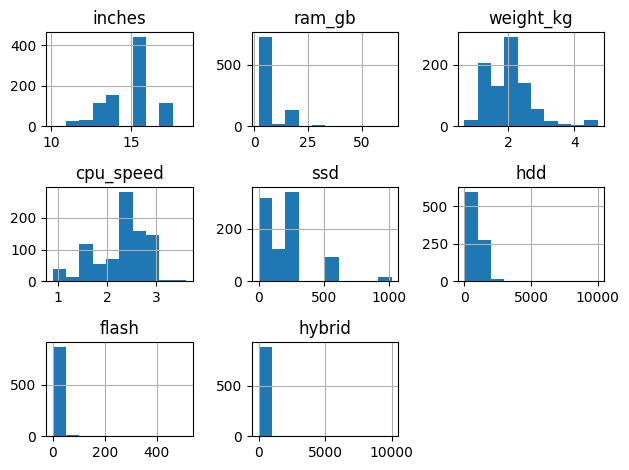

In [20]:
num_feat = ["inches", "ram_gb", "weight_kg", "cpu_speed", "ssd", "hdd", "flash", "hybrid"]
df[num_feat].hist()
plt.tight_layout()

In [21]:
# Podemos intentar normalizar un poco más la columna de ram_gb utilizando un logaritmo:
for col in ["ram_gb", "ssd", "hdd", "flash", "hybrid"]:
    df[col] = np.log(df[col]+1)

In [22]:
df.head()

,Product,Price_in_euros,inches,ram_gb,weight_kg,cpu_speed,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,gpu_model_rx 560,gpu_model_rx 580,gpu_model_w4190m,gpu_model_w4190m,gpu_model_w5130m,gpu_model_w6150m,ssd,hdd,flash,hybrid
755,250 G6,539.00,15.6,2.197225,1.86,2.0,0,0,0,0,...,0,0,0,0,0,0,5.549076,0.000000,0.000000,0.0
618,Inspiron 7559,879.01,15.6,2.833213,2.59,2.6,0,0,0,0,...,0,0,0,0,0,0,0.000000,6.908755,0.000000,0.0
909,ProBook 450,900.00,15.6,2.197225,2.04,2.7,0,0,0,0,...,0,0,0,0,0,0,0.000000,6.908755,0.000000,0.0
2,Macbook Air,898.94,13.3,2.197225,1.34,1.8,0,1,0,0,...,0,0,0,0,0,0,0.000000,0.000000,4.859812,0.0
286,Inspiron 3567,428.00,15.6,1.609438,2.25,2.0,0,0,0,0,...,0,0,0,0,0,0,0.000000,6.908755,0.000000,0.0


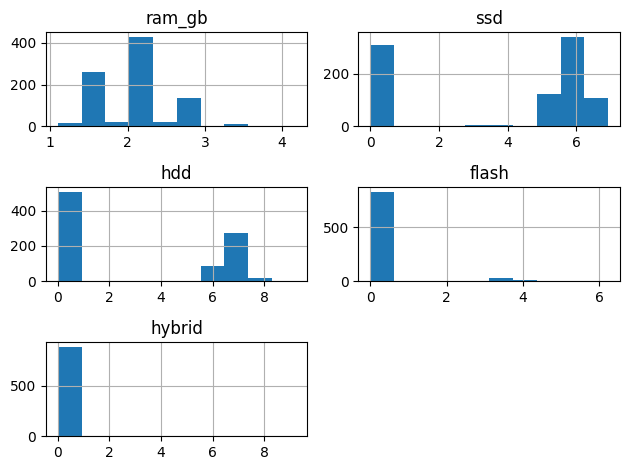

In [23]:
df[["ram_gb", "ssd", "hdd", "flash", "hybrid"]].hist()
plt.tight_layout()

In [24]:
scaler = StandardScaler()

df[num_feat] = scaler.fit_transform(df[num_feat])

In [25]:
feat_sel = list(df.columns)
feat_sel.remove("Product")
feat_sel.remove("Price_in_euros")
# feat_sel.remove("ScreenResolution")
# feat_sel.remove("Memory")
feat_sel

['inches',
 'ram_gb',
 'weight_kg',
 'cpu_speed',
 'Company_Acer',
 'Company_Apple',
 'Company_Asus',
 'Company_Chuwi',
 'Company_Dell',
 'Company_Fujitsu',
 'Company_Google',
 'Company_HP',
 'Company_Huawei',
 'Company_LG',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Mediacom',
 'Company_Microsoft',
 'Company_Razer',
 'Company_Samsung',
 'Company_Toshiba',
 'Company_Vero',
 'Company_Xiaomi',
 'TypeName_2 in 1 Convertible',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'OpSys_Android',
 'OpSys_Chrome OS',
 'OpSys_Linux',
 'OpSys_Mac OS X',
 'OpSys_No OS',
 'OpSys_Windows 10',
 'OpSys_Windows 10 S',
 'OpSys_Windows 7',
 'OpSys_macOS',
 'ScreenResolution_1366x768',
 'ScreenResolution_1440x900',
 'ScreenResolution_1600x900',
 'ScreenResolution_1920x1080',
 'ScreenResolution_2560x1440',
 'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160',
 'ScreenResolution_4K Ultra HD 3840x2160',
 'ScreenResolution_Full HD / Touchscree

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [26]:
X = df[feat_sel]
y = df[target]

### 2. Dividir X_train, X_test, y_train, y_test

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [28]:
X_train.head()

,inches,ram_gb,weight_kg,cpu_speed,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,gpu_model_rx 560,gpu_model_rx 580,gpu_model_w4190m,gpu_model_w4190m,gpu_model_w5130m,gpu_model_w6150m,ssd,hdd,flash,hybrid
112,-0.684253,0.166674,-0.669919,0.797712,0,0,0,0,0,0,...,0,0,0,0,0,0,0.732432,-0.867492,-0.262522,-0.07441
13,0.286890,1.566350,-0.296379,0.991898,0,1,0,0,0,0,...,0,0,0,0,0,0,0.732432,-0.867492,-0.262522,-0.07441
1190,0.425624,-1.126919,0.256461,-1.338339,0,0,1,0,0,0,...,0,0,0,0,0,0,-1.352116,0.979141,-0.262522,-0.07441
55,0.425624,-1.126919,0.555293,0.215153,1,0,0,0,0,0,...,0,0,0,0,0,0,-1.352116,1.184742,-0.262522,-0.07441
1043,1.604870,0.166674,0.898950,0.409339,0,0,0,0,0,0,...,0,0,0,0,0,0,0.732432,-0.867492,-0.262522,-0.07441


In [29]:
y_train.head()

112     1480.00
13      2439.97
1190     369.00
55       384.00
1043    1080.00
Name: Price_in_euros, dtype: float64

### 3. Baseline de modelos


In [30]:
model_names = ["Random Forest", "XGBoost", "LightGBM", "Catboost"]
rf_reg = RandomForestRegressor(random_state = 42)
xg_reg = XGBRFRegressor(random_state = 42)
lgb_reg = LGBMRegressor(random_state = 42, verbose = -100, n_jobs = -1)
cat_reg = CatBoostRegressor(n_estimators = 100, depth = 5, learning_rate = 0.5, verbose = 100)
models = [rf_reg, xg_reg, lgb_reg, cat_reg]

resultados = []

for model_name, modelo in zip(model_names, models):
    metrica = - np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring  = "neg_root_mean_squared_error"))
    data = {
        "model": model_name,
        "RSME": metrica
    }
    print(data)
    resultados.append(data.copy())
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values("RSME", ascending = True)

{'model': 'Random Forest', 'RSME': 304.00958056339334}
{'model': 'XGBoost', 'RSME': 326.69556118108096}
{'model': 'LightGBM', 'RSME': 320.8847888555512}
0:	learn: 546.5821265	total: 143ms	remaining: 14.2s
99:	learn: 107.5071344	total: 261ms	remaining: 0us
0:	learn: 528.9179045	total: 1.54ms	remaining: 152ms
99:	learn: 101.8848101	total: 127ms	remaining: 0us
0:	learn: 511.6310536	total: 1.6ms	remaining: 159ms
99:	learn: 107.4448434	total: 131ms	remaining: 0us
0:	learn: 531.8607596	total: 1.75ms	remaining: 173ms
99:	learn: 107.5711822	total: 130ms	remaining: 0us
0:	learn: 514.0998868	total: 1.5ms	remaining: 149ms
99:	learn: 101.6147277	total: 126ms	remaining: 0us
{'model': 'Catboost', 'RSME': 290.778957037905}


,model,RSME
3,Catboost,290.778957
0,Random Forest,304.009581
2,LightGBM,320.884789
1,XGBoost,326.695561


In [31]:
cat_reg.fit(X_train, y_train)

y_pred = cat_reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

0:	learn: 531.6779472	total: 2.46ms	remaining: 244ms
99:	learn: 118.6180263	total: 140ms	remaining: 0us
281.7960737332431


In [32]:
rf_reg.fit(X_train, y_train)

y_pred = rf_reg.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

320.0584578412219


In [33]:
cat_reg = CatBoostRegressor(verbose = 100)

param_grid = {
    'iterations': [500, 1000, 2000],  # Cuántos árboles usar
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'depth': [4, 8, 10],  # Profundidad de los árboles
    'l2_leaf_reg': [1, 4, 10],  # Regularización L2
    'colsample_bylevel': [0.8, 1]  # Porcentaje de features usadas por nivel del árbol
}

grid_model = RandomizedSearchCV(cat_reg, param_distributions = param_grid, n_iter = 162, scoring = "neg_root_mean_squared_error", cv = 4, n_jobs= -1, random_state = 42)

grid_model.fit(X_train, y_train)

print(grid_model.best_score_)
best_model = grid_model.best_estimator_

C:\Users\mpuch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 162 is smaller than n_iter=500. Running 162 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0:	learn: 643.0747783	total: 1.96ms	remaining: 1.95s
100:	learn: 222.6181066	total: 142ms	remaining: 1.26s
200:	learn: 176.0764673	total: 295ms	remaining: 1.17s
300:	learn: 152.7380716	total: 429ms	remaining: 995ms
400:	learn: 135.1859257	total: 563ms	remaining: 841ms
500:	learn: 121.4107061	total: 693ms	remaining: 690ms
600:	learn: 109.6293372	total: 831ms	remaining: 552ms
700:	learn: 102.2352918	total: 953ms	remaining: 407ms
800:	learn: 95.4904421	total: 1.09s	remaining: 270ms
900:	learn: 88.7153533	total: 1.22s	remaining: 134ms
999:	learn: 84.6395145	total: 1.35s	remaining: 0us
-271.17853582820794


In [36]:
# rf_reg = RandomForestRegressor(random_state = 42)

# param_grid = {
#     "n_estimators": [50, 100, 200, 300],  
#     "max_depth": [10, 20, 30, None],      
#     "min_samples_split": [2, 5, 10],       
#     "min_samples_leaf": [1, 2, 4],      
#     "max_features": [None, "sqrt", "log2"],  
#     "bootstrap": [True, False]            
# }

# grid_model = RandomizedSearchCV(rf_reg, param_distributions = param_grid, n_iter = 40, scoring = "neg_root_mean_squared_error", cv = 4, n_jobs= -1, random_state = 42)

# grid_model.fit(X_train, y_train)

# print(grid_model.best_score_)
# best_model2 = grid_model.best_estimator_

### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [34]:
y_pred = best_model.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))

282.28771216021744


In [35]:
# y_pred = best_model2.predict(X_test)

# print(np.sqrt(mean_squared_error(y_test, y_pred)))

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [36]:
X_pred = pd.read_csv("data/test.csv", index_col = 0)
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [37]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [38]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [39]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)
X_pred.drop(columns = ["Inches", "Ram", "Weight"], inplace = True)

In [40]:
# Tratamiento de la columna Cpu:
X_pred["cpu_brand"] = X_pred["Cpu"].apply(lambda x: x.split()[0])
X_pred["cpu_speed"] = X_pred["Cpu"].apply(lambda x: float(x.split()[-1].replace("GHz", "")))
X_pred.drop(columns = ["Cpu"], inplace = True)

X_pred[["gpu_brand", "gpu_model"]] = X_pred["Gpu"].apply(process_gpu)
X_pred.drop(columns = "Gpu", inplace = True)

X_pred[["ssd", "hdd", "flash", "hybrid"]] = X_pred["Memory"].apply(process_memory)
X_pred.drop(columns = "Memory", inplace = True)

for col in ["ram_gb", "ssd", "hdd", "flash", "hybrid"]:
    X_pred[col] = np.log(X_pred[col]+1)

X_pred[num_feat] = scaler.transform(X_pred[num_feat])

# Hacemos un One Hot Encoding para estas cuatro variables categóricas que tienen pocas categorías:
train_columns_dummies = X_train.columns
X_pred = pd.get_dummies(X_pred, columns = columns_dummies, dtype = int).reindex(columns = train_columns_dummies, fill_value=0)

In [41]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 177 entries, inches to hybrid
dtypes: float64(8), int32(120), int64(49)
memory usage: 360.5 KB


In [42]:
predictions_submit = best_model.predict(X_pred)
predictions_submit

array([1796.62665281,  313.74031787,  359.63712231, 1127.90984103,
       1108.29318621,  403.52837901,  745.15190464, 1022.43967577,
       1213.07641324,  329.83741844, 2263.56961364, 1334.4462878 ,
        523.13271353, 1420.22244587,  796.90174371,  646.73393985,
       2564.36986644, 1599.29187365, 2013.06389893,  619.58473311,
       1474.11399529,  401.47223038,  794.23585349, 1149.92245553,
        407.37778988,  709.20282555,  540.62261102,  701.67624479,
       3144.39039111, 1152.30011023, 2446.68109117,  410.35652458,
        871.23021343, 2738.21187453, 2621.20619183, 1508.84777414,
        617.60914187, 1285.27531816,  899.79232909, 1802.05456682,
        695.39795041,  751.93196022,  521.2529819 , 1344.13522274,
       1168.31098424, 1053.88925391, 1128.69330116,  621.8236096 ,
        666.58902538,  478.34485362, 1617.72101279,  706.75826318,
       1133.02496248,  666.07045848, 1843.76766002, 1685.21108031,
        790.09267051,  857.99153431,  849.79786829,  629.34824

In [43]:
# predictions_submit = best_model2.predict(X_pred)
# predictions_submit

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [44]:
sample = pd.read_csv("data/sample_submission.csv")

In [45]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [46]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [47]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index,
                        "Price_in_euros": predictions_submit})

In [48]:
submission.head()

,laptop_ID,Price_in_euros
0,209,1796.626653
1,1281,313.740318
2,1168,359.637122
3,1231,1127.909841
4,1020,1108.293186


In [49]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [50]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [51]:
chequeador(submission)

You're ready to submit!
